# Coursework 2: Neural Networks 

This coursework covers the topics covered in class regarding neural networks for image classification.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

**Note 2** If you are using the virtual environment please run the following command before importing tensorflow

`export LD_LIBRARY_PATH=/vol/cuda/9.0.176/lib64/:"${LD_LIBRARY_PATH}}"` 

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

D:\Users\ONE10\Anaconda3\envs\tfdeeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Question 1 (20 points)

Throughout this coursework you will be working with the Fashion-MNIST dataset. If you are interested, you may find relevant information regarding the dataset in this paper.

[1] Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Be sure that you have the following files in your working directory: data.tar.gz and reader.py. Loading the data can be done as follows:

`from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()`

The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-D vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

### 1.1 Load data (6 points)
Load the dataset and print the dimensions of the training set and the test set.

In [39]:
from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### 1.2 Visualize data (6 points)
Visualise 3 training images (T-shirt, trousers and pullover) and 3 test images (dress, coat and sandal).

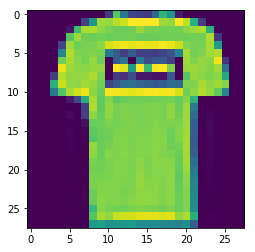

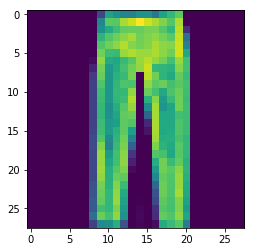

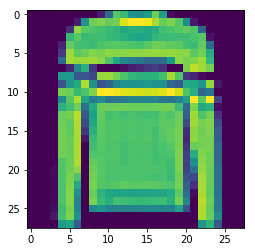

In [40]:
n_tshirt=np.argwhere(y_train==0)[0]
n_trousers=np.argwhere(y_train==1)[0]
n_pullover=np.argwhere(y_train==2)[0]

img_tshirt = x_train[n_tshirt]
plt.imshow(np.reshape(img_tshirt,(28,28)))
plt.figure()
img_trousers = x_train[n_trousers]
plt.imshow(np.reshape(img_trousers,(28,28)))
plt.figure()
img_pullover = x_train[n_pullover]
plt.imshow(np.reshape(img_pullover,(28,28)))
plt.figure()

### 1.3 Data balance (4 points)
Print out the number of training samples for each class.

Text(0.5,1,'Histogram of class balance')

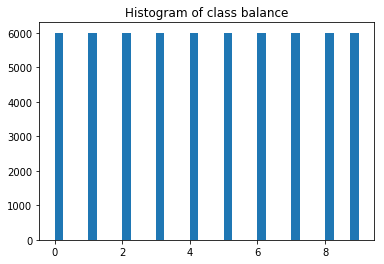

In [41]:
plt.hist(y_train, bins='auto')
plt.title("Histogram of class balance")

### 1.4 Discussion (4 points)
Is the dataset balanced? What would happen if the dataset is not balanced in the context of image classification? 

yes, the dataset is perfectly balanced, if the data is not balanced, the algorithm will prefer to give output in favor of the majority class as it has more probability of getting correct by guessing in favor of the majority class. This will prevent the minority class from being predicted, and sometimes neglected.

## Question 2 (40 points)

Build a neural network and train it with the Fashion-MNIST dataset. Here, we use the keras library, which is a high-level neural network library built upon tensorflow.

In [42]:
# Convert the label class into a one-hot representation
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten, Dense, Reshape, MaxPool2D, Input, Activation
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [43]:
x_train.shape

(60000, 784)

### 2.1 Build a multi-layer perceptron, also known as multi-layer fully connected network. You need to define the number of classes, the layers, the loss function, the optimiser and evaluation metric. (30 points)

In [49]:
model = keras.models.Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(MaxPool2D())
model.add(Conv2D(1024,(1,1),padding="same",activation="relu"))
model.add(Conv2D(1024,(1,1),padding="same",activation="relu"))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(16))
model.add(Activation("relu"))
#model.add(Dense(10, input_shape=(784,)))
model.add(Dense(10))
model.add(Activation("sigmoid"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 7, 7, 128)         0         
__________

### 2.2 Define the optimisation parameters including the batch size and the number of epochs and then run the optimiser. (10 points)

We have tested that for an appropriate network architecture, on a personal laptop and with only CPU, it takes about a few seconds per epoch to train the network. For 100 epochs, it takes about a coffee break's time to finish the training. If you run it on a powerful GPU, it would be even much faster.

In [51]:
batch_size = 128
epochs = 100
model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs,validation_split=0.05)

Train on 57000 samples, validate on 3000 samples
Epoch 1/100
57000/57000 [==============================] - 115s 2ms/step - loss: 1.0892 - acc: 0.3913 - val_loss: 0.7609 - val_acc: 0.5480
Epoch 2/100
57000/57000 [==============================] - 117s 2ms/step - loss: 0.6686 - acc: 0.5780 - val_loss: 0.6336 - val_acc: 0.6007
Epoch 3/100
57000/57000 [==============================] - 117s 2ms/step - loss: 0.5220 - acc: 0.7251 - val_loss: 0.4115 - val_acc: 0.7947
Epoch 4/100
57000/57000 [==============================] - 116s 2ms/step - loss: 0.3569 - acc: 0.8420 - val_loss: 0.3177 - val_acc: 0.8930
Epoch 5/100
57000/57000 [==============================] - 116s 2ms/step - loss: 0.2675 - acc: 0.9044 - val_loss: 0.2616 - val_acc: 0.9177
Epoch 6/100
57000/57000 [==============================] - 117s 2ms/step - loss: 0.2251 - acc: 0.9215 - val_loss: 0.2728 - val_acc: 0.9137
Epoch 7/100
57000/57000 [==============================] - 118s 2ms/step - loss: 0.2107 - acc: 0.9259 - val_loss: 0.2

KeyboardInterrupt: 

## Question 3 (20 points) 

Evaluate the performance of your network with the test data. 
Visualize the performance using appropriate metrics and graphs (eg. confusion matrix). 
Comment on your per class performance and how it could be better.

In [57]:
import itertools

# This function is provided for you to display the confusion matrix.
# For more information about the confusion matrix, you can read at
# https://en.wikipedia.org/wiki/Confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        
        cm: confusion matrix
        classes: a list of the class labels or class names
        normalize: normalize the matrix so that each row amounts to one
        cmap: color map
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### 3.1 Evaluate the classification accuracy on the test set (10 points)

In [52]:
model.evaluate(x=x_test,y=y_test)

10000/10000 [==============================] - 7s 716us/step


[0.34918364736437796, 0.9174]

### 3.2 Calculate and plot the confusion matrix (10 points)

Confusion matrix, without normalization
[[841.   0.  11.   5.   1.   0. 102.   0.   2.   0.]
 [  3. 990.   1.   5.   0.   0.   1.   0.   1.   0.]
 [ 26.   0. 874.   5.  35.   7.  50.   0.   1.   2.]
 [ 26.   9.  12. 953.  26.   0.  42.   0.   3.   0.]
 [  1.   0.  42.  13. 902.   0.  82.   0.   1.   0.]
 [  3.   0.   0.   1.   0. 977.   0.   7.   4.   3.]
 [ 92.   0.  60.  16.  31.   0. 713.   0.   2.   0.]
 [  0.   0.   0.   1.   0.  11.   0. 982.   1.  38.]
 [  8.   1.   0.   1.   4.   2.  10.   0. 985.   0.]
 [  0.   0.   0.   0.   1.   3.   0.  11.   0. 957.]]


ValueError: Unknown format code 'd' for object of type 'float'

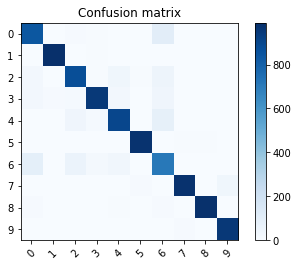

In [58]:
y_pred = model.predict(x_test)
confusion_mat = np.zeros([10,10])

for pred,true in zip(y_pred,y_test):
    confusion_mat[pred.argmax(axis=0),true.argmax(axis=0)] += 1
    
plot_confusion_matrix(confusion_mat,[0,1,2,3,4,5,6,7,8,9])

## Question 4 (20 points)
Take two photos, one of your clothes or shoes that belongs to one of 10 classes, the other that does not belong to any class.

Use either Python or other software (Photoshop, Gimp, or any image editer) to convert the photos into grayscale, crop the region of interest and reshape into the size of 28x28.

### 4.1 Load and visualise your own images (6 points)

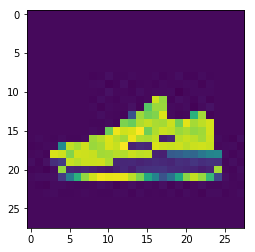

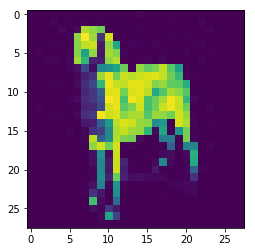

In [86]:
import cv2
img_shoe = cv2.imread('shoe_test.jpg',0)
plt.imshow(img_shoe)
x_shoe = np.expand_dims(img_shoe.flatten(),axis=1).transpose()

plt.figure()
img_derp = cv2.imread('derp_test.jpg',0)
plt.imshow(img_derp)
x_derp = np.expand_dims(img_derp.flatten(),axis=1).transpose()

In [87]:
x_shoe.shape

(1, 784)

### 4.2 Test your network on the two images and show the classification results (10 points)

In [88]:
y_shoe = model.predict(x=x_shoe)
pred_shoe = y_shoe.argmax(axis=1)
print(y_shoe)
print("predicted class for sneaker=",pred_shoe)

print('')

y_derp = model.predict(x=x_derp)
pred_derp = y_derp.argmax(axis=1)
print(y_derp)
print("predicted class for irrelevant image=",pred_derp)

[[1.1836485e-03 5.4673988e-06 7.7345285e-05 1.2961180e-04 8.4386568e-04
  7.5760819e-02 2.1387781e-05 8.3024180e-01 1.7305581e-03 1.2619030e-01]]
predicted class for sneaker= [7]

[[3.2106738e-03 6.8168604e-04 2.1514834e-03 9.9056518e-01 7.4113547e-03
  2.3367734e-07 2.5452554e-02 1.2564991e-10 3.9299801e-05 6.0668093e-09]]
predicted class for irrelevant image= [3]


### 4.3 Discuss the classification results and provide one method to improve real life performance of the network (4 points)

In [77]:
y_shoe

array([[1.1836485e-03, 5.4673988e-06, 7.7345285e-05, 1.2961180e-04,
        8.4386568e-04, 7.5760819e-02, 2.1387781e-05, 8.3024180e-01,
        1.7305581e-03, 1.2619030e-01]], dtype=float32)

## 5. Survey
How long did the coursework take you to solve? 